# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
print(combined_df["Mouse ID"].nunique())

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]["Mouse ID"].unique()

# Output the array
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df[combined_df["Mouse ID"] == "g989"]

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_df[combined_df["Mouse ID"] != "g9898"]

clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
print(clean_data["Mouse ID"].nunique())

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().rename("Mean Tumor Volume").to_frame()
summary_stats["Median Tumor Volume"] = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_stats["Tumor Volume Variance"] = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_stats["Tumor Volume St. Dev."] = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_stats["Tumor Volume St. Err."] = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#Display the summary statistics DataFrame
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_single_line = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median", "var","std","sem"])

#Display the summary statistics DataFrame
summary_stats_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

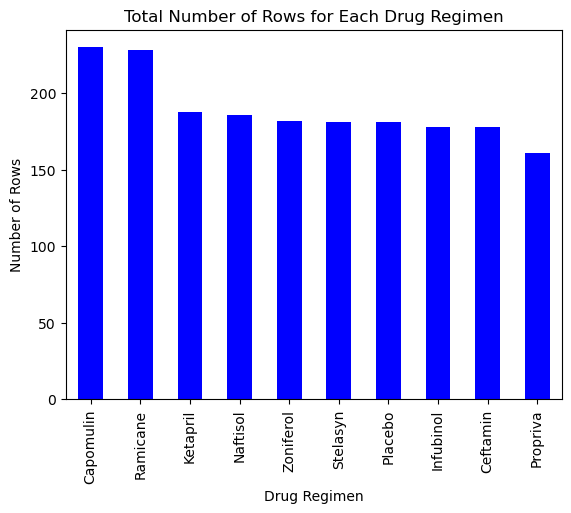

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Create a DataFrame with value counts for each drug regimen
drug_counts = clean_data["Drug Regimen"].value_counts()

drug_counts.plot(kind="bar", color="blue")

# Add labels and title
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

# Show the plot
plt.show()

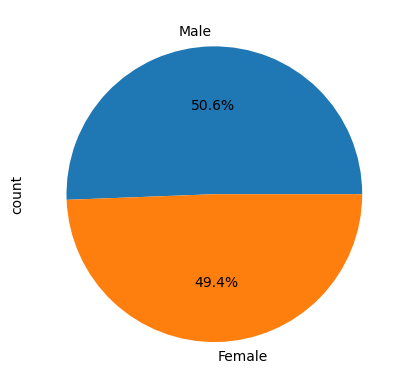

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Ask BCS
drug_counts = clean_data.Sex.value_counts()
drug_counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Step 1: Filter the data for the specified treatment regimens
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data["Drug Regimen"].isin(specified_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
# Step 2: Group the filtered data by mouse ID and find the maximum timepoint for each mouse
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Step 3: Merge the group dataframe with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Loop through each treatment
for treatment in treatments:
    # Filter the data for the current treatment
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add tumor volume data to the list
    tumor_vol_data.append(treatment_data)
    
    # Calculate quartiles, IQR, and bounds for potential outliers
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)

    # Check for potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


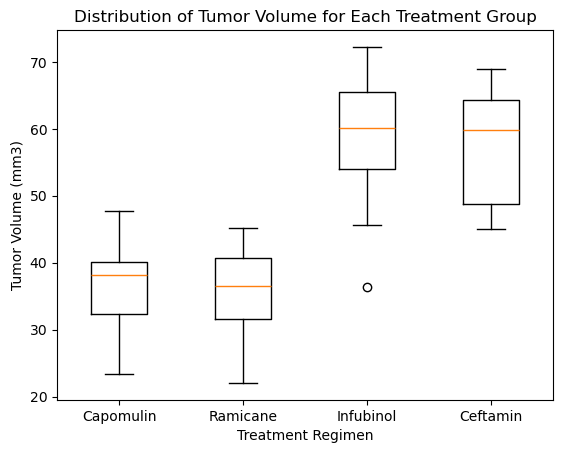

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a box plot
plt.boxplot(tumor_vol_data, labels=treatments)

# Add labels and title
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()


## Line and Scatter Plots

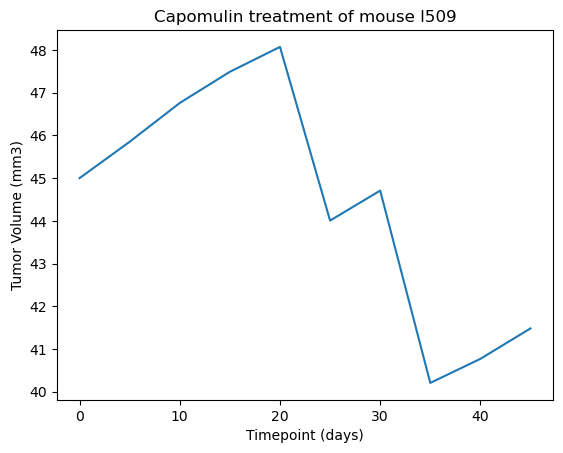

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for mice treated with Capomulin
# Ask BCS
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
single_mouse_data = capomulin_data.loc[capomulin_data['Mouse ID']== 'l509']
plt.plot(single_mouse_data['Timepoint'],single_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


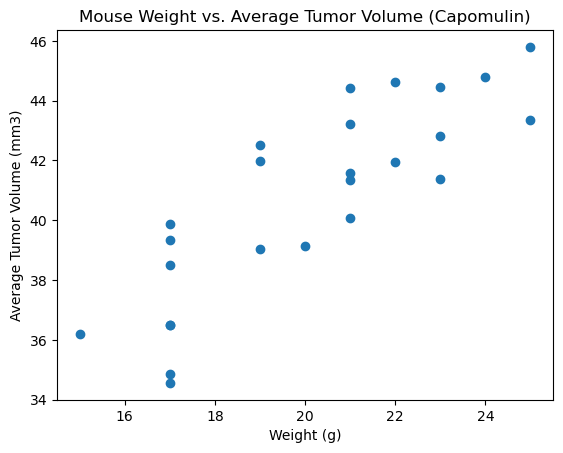

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group the Capomulin data by Mouse ID to calculate the average tumor volume for each mouse
capomulin_avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(capomulin_avg_tumor_volume, mouse_metadata, on="Mouse ID")

# Plot the scatter plot
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")

# Show the plot

plt.show()


## Correlation and Regression

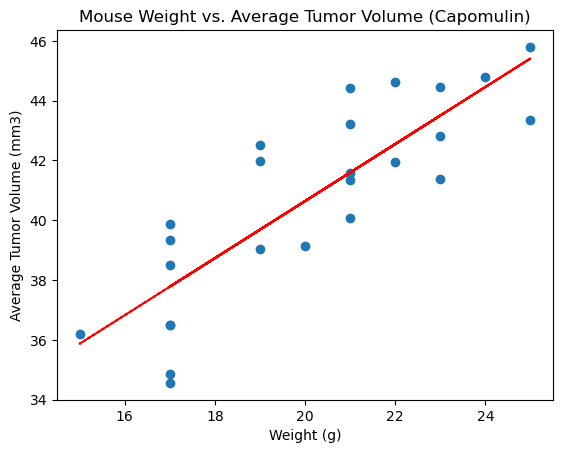

In [47]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
# Calculate the correlation coefficient
correlation_coefficient = merged_data["Weight (g)"].corr(merged_data["Tumor Volume (mm3)"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])

# Generate predicted tumor volume values based on the linear regression model
predicted_tumor_volume = slope * merged_data["Weight (g)"] + intercept

# Plot the scatter plot with the linear regression line
plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])
plt.plot(merged_data["Weight (g)"], predicted_tumor_volume, color='red', linestyle='--')

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")



# Show the plot

plt.show()
